# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

### Market Analysis

In [2]:
market_analysis = pd.read_csv('market_analysis.csv', delimiter=';', decimal=',')

In [3]:
market_analysis.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2,10,899.959992,31,0.064516,449.979996,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2,10,13500.000000,30,1.000000,450.000000,NaN,NaN
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2,10,450.000000,29,0.034483,450.000000,8.0,1.0


In [4]:
print(f'The Market Analysis dataset has {market_analysis.shape[0]} instances')

The Market Analysis dataset has 116619 instances


In [5]:
print(f'The Market Analysis dataset has {market_analysis.shape[1]} attributes')

The Market Analysis dataset has 14 attributes


#### **Remove Duplicates**

In [6]:
market_analysis.duplicated().sum()

0

In [7]:
market_analysis_cleaned = market_analysis.drop_duplicates()

In [8]:
print(f'Removed duplicates from Market Analysis Dataset: {(market_analysis.shape[0] - market_analysis_cleaned.shape[0])}')

Removed duplicates from Market Analysis Dataset: 0


#### **Remove Missing Values**

In [9]:
market_analysis_cleaned.isnull().sum()

unified_id          0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests              0
revenue             6
openness            0
occupancy           0
nightly rate    23473
lead time       30594
length stay     30594
dtype: int64

In [10]:
market_analysis_cleaned.isnull().any(axis = 1).sum()

30594

In [11]:
market_analysis_cleaned = market_analysis_cleaned.dropna()

In [12]:
print(f'Removed missing values from Market Analysis Dataset: {(market_analysis.shape[0] - market_analysis_cleaned.shape[0])}')

Removed missing values from Market Analysis Dataset: 30594


#### **Split Month and Year**

In [13]:
market_analysis_cleaned['year'] = market_analysis_cleaned['month'].str[:4].astype('int64')
market_analysis_cleaned['month'] = market_analysis_cleaned['month'].str.extract(r'-(\d+)').astype('int64')

In [14]:
market_analysis_cleaned['year'].value_counts()

2022    34729
2021    29527
2020    21769
Name: year, dtype: int64

In [15]:
market_analysis_cleaned['month'].value_counts()

12    9006
11    8343
1     7700
7     7627
9     7543
2     7497
10    7311
8     7056
3     6648
6     6043
5     6028
4     5223
Name: month, dtype: int64

In [16]:
market_analysis_cleaned.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay,year
0,10000347,1,92315,Big Bear Lake,2-5 Units,3,2,10,899.959992,31,0.064516,449.979996,52.000000,3.000000,2020
4,10000347,2,92315,Big Bear Lake,2-5 Units,3,2,10,450.000000,29,0.034483,450.000000,8.000000,1.000000,2020
7,10000347,7,92315,Big Bear Lake,2-5 Units,3,2,10,12600.000000,29,0.965517,450.000000,7.363636,2.545455,2020
9,10000347,9,92315,Big Bear Lake,2-5 Units,3,2,10,13500.000000,30,1.000000,450.000000,11.000000,174.000000,2020
15,10000347,3,92315,Big Bear Lake,2-5 Units,3,2,10,5400.000000,31,0.387097,450.000000,6.625000,1.500000,2021


#### **Changing the Data Type of Bathrooms**

In [17]:
market_analysis_cleaned['bathrooms'] = market_analysis_cleaned['bathrooms'].astype('float')

In [18]:
market_analysis_cleaned['bathrooms'].value_counts()

2.0    45340
3.0    15364
2.5     8472
3.5     3838
1.0     3824
4.0     3677
1.5     3085
4.5     1249
5.0      541
5.5      299
6.0      226
7.0       64
0.5       35
0.0       11
Name: bathrooms, dtype: int64

#### **Changing the Data Type of Guests**

In [19]:
market_analysis_cleaned['guests'] = market_analysis_cleaned['guests'].replace('15+', '15').astype('int64')

In [20]:
market_analysis_cleaned['guests'].value_counts()

8     22806
6     16817
10    13201
7      8080
12     6316
9      5033
15     4579
14     2547
11     2413
5      2260
13     1394
4       537
2        36
3         6
Name: guests, dtype: int64

#### **Renaming Some Columns**

In [21]:
market_analysis_cleaned = market_analysis_cleaned.rename(columns = {'nightly rate' : 'nightly_rate', 'lead time' : 'lead_time', 'length stay' : 'length_stay'})

In [22]:
market_analysis_cleaned = market_analysis_cleaned[['unified_id', 'month', 'year', 'zipcode', 'city', 'host_type', 'bedrooms', 'bathrooms', 'guests', 'revenue', 'openness', 'occupancy', 'nightly_rate', 'lead_time', 'length_stay']]

In [23]:
market_analysis_cleaned.head()

,unified_id,month,year,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,10000347,1,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,899.959992,31,0.064516,449.979996,52.000000,3.000000
4,10000347,2,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,450.000000,29,0.034483,450.000000,8.000000,1.000000
7,10000347,7,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,12600.000000,29,0.965517,450.000000,7.363636,2.545455
9,10000347,9,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,13500.000000,30,1.000000,450.000000,11.000000,174.000000
15,10000347,3,2021,92315,Big Bear Lake,2-5 Units,3,2.0,10,5400.000000,31,0.387097,450.000000,6.625000,1.500000


In [24]:
print(f'The Market Analysis dataset now has {market_analysis_cleaned.shape[0]} instances')

The Market Analysis dataset now has 86025 instances


In [25]:
print(f'The Market Analysis dataset now has {market_analysis_cleaned.shape[1]} attributes')

The Market Analysis dataset now has 15 attributes


In [26]:
market_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86025 entries, 0 to 116616
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unified_id    86025 non-null  int64  
 1   month         86025 non-null  int64  
 2   year          86025 non-null  int64  
 3   zipcode       86025 non-null  int64  
 4   city          86025 non-null  object 
 5   host_type     86025 non-null  object 
 6   bedrooms      86025 non-null  int64  
 7   bathrooms     86025 non-null  float64
 8   guests        86025 non-null  int64  
 9   revenue       86025 non-null  float64
 10  openness      86025 non-null  int64  
 11  occupancy     86025 non-null  float64
 12  nightly_rate  86025 non-null  float64
 13  lead_time     86025 non-null  float64
 14  length_stay   86025 non-null  float64
dtypes: float64(6), int64(7), object(2)
memory usage: 10.5+ MB


### Amenities

In [27]:
amenities = pd.read_csv('amenities.csv', delimiter=';', decimal=',')

In [28]:
amenities.head()

,unified_id,month,hot_tub,pool
0,AIR10052559,2022-12,1,0
1,AIR10178668,2022-12,0,0
2,AIR10211700,2022-12,0,0
3,AIR10344705,2022-12,0,0
4,AIR10424683,2022-12,0,1


In [29]:
print(f'The Amenities dataset has {amenities.shape[0]} instances')

The Amenities dataset has 49311 instances


In [30]:
print(f'The Amenities dataset has {amenities.shape[1]} attributes')

The Amenities dataset has 4 attributes


#### **Remove Duplicates**

In [31]:
amenities.duplicated().sum()

0

In [32]:
amenities_cleaned = amenities.drop_duplicates()

In [33]:
print(f'Removed duplicates from Market Analysis Dataset: {(amenities.shape[0] - amenities_cleaned.shape[0])}')

Removed duplicates from Market Analysis Dataset: 0


#### **Remove Missing Values**

In [34]:
amenities_cleaned.isnull().sum()

unified_id    0
month         0
hot_tub       0
pool          0
dtype: int64

In [35]:
amenities_cleaned.isnull().any(axis = 1).sum()

0

In [36]:
amenities_cleaned = amenities_cleaned.dropna()

In [37]:
print(f'Removed missing values from Market Analysis Dataset: {(amenities.shape[0] - amenities_cleaned.shape[0])}')

Removed missing values from Market Analysis Dataset: 0


#### **Remove String from unified_id**

In [38]:
amenities_cleaned['unified_id'] = amenities_cleaned['unified_id'].str.replace('AIR', '').astype('int64')

In [39]:
amenities_cleaned.head()

,unified_id,month,hot_tub,pool
0,10052559,2022-12,1,0
1,10178668,2022-12,0,0
2,10211700,2022-12,0,0
3,10344705,2022-12,0,0
4,10424683,2022-12,0,1


#### **Split Month and Year**

In [40]:
amenities_cleaned['year'] = amenities_cleaned['month'].str[:4].astype('int64')
amenities_cleaned['month'] = amenities_cleaned['month'].str.extract(r'-(\d+)').astype('int64')

In [41]:
amenities_cleaned['year'].value_counts()

2020    21626
2021    15877
2022    11808
Name: year, dtype: int64

In [42]:
amenities_cleaned['month'].value_counts()

1     4680
2     4603
3     4579
4     4444
5     4274
6     4173
7     3974
8     3891
9     3791
10    3716
11    3615
12    3571
Name: month, dtype: int64

In [43]:
amenities_cleaned.head()

,unified_id,month,hot_tub,pool,year
0,10052559,12,1,0,2022
1,10178668,12,0,0,2022
2,10211700,12,0,0,2022
3,10344705,12,0,0,2022
4,10424683,12,0,1,2022


In [44]:
print(f'The Amenities dataset now has {amenities_cleaned.shape[0]} instances')

The Amenities dataset now has 49311 instances


In [45]:
print(f'The Amenities dataset now has {amenities_cleaned.shape[1]} attributes')

The Amenities dataset now has 5 attributes


In [46]:
amenities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   unified_id  49311 non-null  int64
 1   month       49311 non-null  int64
 2   hot_tub     49311 non-null  int64
 3   pool        49311 non-null  int64
 4   year        49311 non-null  int64
dtypes: int64(5)
memory usage: 2.3 MB


### Geolocation

In [47]:
geolocation = pd.read_csv('geolocation.csv', delimiter=';', decimal=',')

In [48]:
geolocation.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,NaN,34.24516,-116.87618
3,AIR10344705,2022-12,NaN,34.26750,-116.86089
4,AIR10424683,2022-12,Starvation Flats Road,34.25341,-116.88025


In [49]:
print(f'The Geolocation dataset has {geolocation.shape[0]} instances')

The Geolocation dataset has 49311 instances


In [50]:
print(f'The Geolocation dataset has {geolocation.shape[1]} attributes')

The Geolocation dataset has 5 attributes


#### **Remove Duplicates**

In [51]:
geolocation.duplicated().sum()

0

In [52]:
geolocation_cleaned = geolocation.drop_duplicates()

In [53]:
print(f'Removed duplicates from Geolocation Dataset: {(geolocation.shape[0] - geolocation_cleaned.shape[0])}')

Removed duplicates from Geolocation Dataset: 0


#### **Dealing with Missing Values**

In [54]:
geolocation_cleaned.isnull().sum()

unified_id         0
month              0
street_name    37722
latitude           0
longitude          0
dtype: int64

In [55]:
geolocation_cleaned.drop('street_name', axis = 1, inplace = True)

In [56]:
print(f'Removed attributes from Geolocation Dataset: {(geolocation.shape[1] - geolocation_cleaned.shape[1])}')

Removed attributes from Geolocation Dataset: 1


#### **Remove String from unified_id**

In [57]:
geolocation_cleaned['unified_id'] = geolocation_cleaned['unified_id'].str.replace('AIR', '').astype('int64')

In [58]:
geolocation_cleaned.head()

,unified_id,month,latitude,longitude
0,10052559,2022-12,34.23948,-116.87991
1,10178668,2022-12,34.25095,-116.94139
2,10211700,2022-12,34.24516,-116.87618
3,10344705,2022-12,34.26750,-116.86089
4,10424683,2022-12,34.25341,-116.88025


#### **Split Month and Year**

In [59]:
geolocation_cleaned['year'] = geolocation_cleaned['month'].str[:4].astype('int64')
geolocation_cleaned['month'] = geolocation_cleaned['month'].str.extract(r'-(\d+)').astype('int64')

In [60]:
geolocation_cleaned['year'].value_counts()

2020    21626
2021    15877
2022    11808
Name: year, dtype: int64

In [61]:
geolocation_cleaned['month'].value_counts()

1     4680
2     4603
3     4579
4     4444
5     4274
6     4173
7     3974
8     3891
9     3791
10    3716
11    3615
12    3571
Name: month, dtype: int64

In [62]:
geolocation_cleaned.head()

,unified_id,month,latitude,longitude,year
0,10052559,12,34.23948,-116.87991,2022
1,10178668,12,34.25095,-116.94139,2022
2,10211700,12,34.24516,-116.87618,2022
3,10344705,12,34.26750,-116.86089,2022
4,10424683,12,34.25341,-116.88025,2022


In [63]:
print(f'The Geolocation dataset now has {geolocation_cleaned.shape[0]} instances')

The Geolocation dataset now has 49311 instances


In [64]:
print(f'The Geolocation dataset now has {geolocation_cleaned.shape[1]} attributes')

The Geolocation dataset now has 5 attributes


In [65]:
geolocation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unified_id  49311 non-null  int64  
 1   month       49311 non-null  int64  
 2   latitude    49311 non-null  float64
 3   longitude   49311 non-null  float64
 4   year        49311 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 2.3 MB


### Merging Datasets

In [66]:
airbnb = pd.merge(market_analysis_cleaned, amenities_cleaned, on = ['unified_id', 'month', 'year'], how = 'inner')
airbnb = pd.merge(airbnb, geolocation_cleaned, on = ['unified_id', 'month', 'year'], how = 'inner')

In [67]:
airbnb

,unified_id,month,year,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool,latitude,longitude
0,10000347,1,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,899.959992,31,0.064516,449.979996,52.000000,3.000000,0,0,34.242234,-116.943297
1,10000347,2,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,450.000000,29,0.034483,450.000000,8.000000,1.000000,0,0,34.242234,-116.943297
2,10000347,7,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,12600.000000,29,0.965517,450.000000,7.363636,2.545455,0,0,34.242230,-116.943300
3,10000347,9,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,13500.000000,30,1.000000,450.000000,11.000000,174.000000,0,0,34.242230,-116.943300
4,10000347,3,2021,92315,Big Bear Lake,2-5 Units,3,2.0,10,5400.000000,31,0.387097,450.000000,6.625000,1.500000,0,0,34.242230,-116.943300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40709,9996370,5,2021,92314,Big Bear City,Single Owners,3,1.0,8,700.000000,31,0.096774,233.333333,19.000000,3.000000,0,0,34.267070,-116.861130
40710,9996370,6,2021,92314,Big Bear City,Single Owners,3,1.0,8,1700.000000,30,0.266667,212.500000,16.000000,2.666667,0,0,34.267070,-116.861130
40711,9996370,7,2021,92314,Big Bear City,Single Owners,3,1.0,8,5500.000000,31,0.806452,220.000000,38.750000,3.125000,0,0,34.267070,-116.861130
40712,9996370,8,2021,92314,Big Bear City,Single Owners,3,1.0,8,4300.000000,31,0.645161,215.000000,19.000000,5.000000,0,0,34.267070,-116.861130


#### **Double-checking for Duplicates**

In [68]:
airbnb.duplicated().sum()

0

#### **Double-checking for Missing Values**

In [69]:
airbnb.isnull().sum()

unified_id      0
month           0
year            0
zipcode         0
city            0
host_type       0
bedrooms        0
bathrooms       0
guests          0
revenue         0
openness        0
occupancy       0
nightly_rate    0
lead_time       0
length_stay     0
hot_tub         0
pool            0
latitude        0
longitude       0
dtype: int64

In [70]:
airbnb.isnull().any(axis = 1).sum()

0

#### **Feature Scaling**

In [71]:
scaling_columns = ['revenue', 'openness', 'occupancy', 'nightly_rate', 'lead_time', 'length_stay']

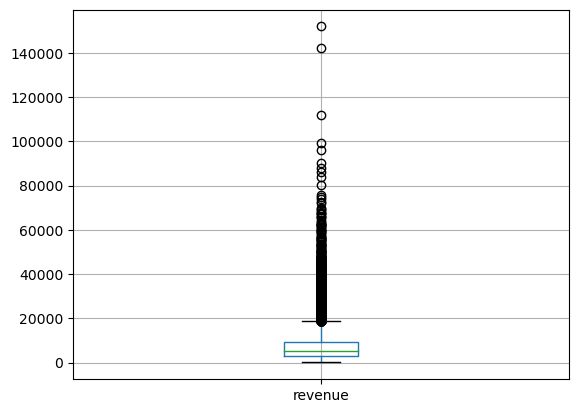

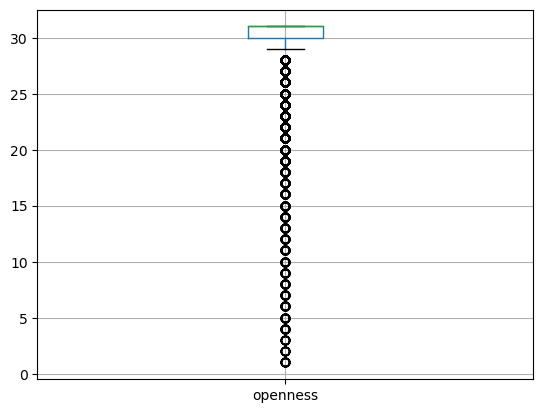

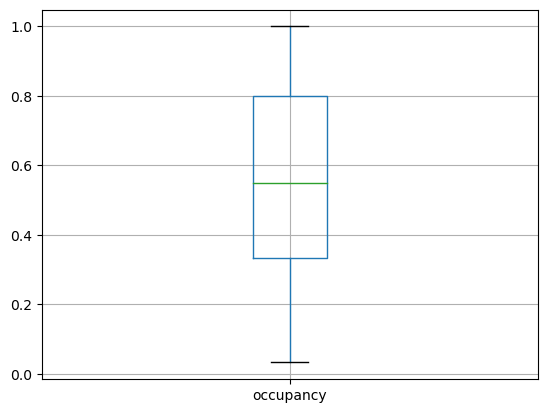

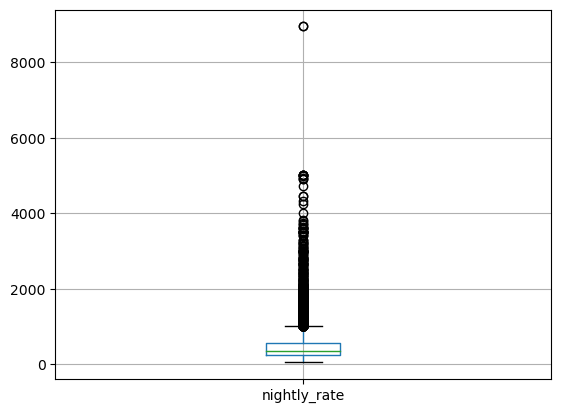

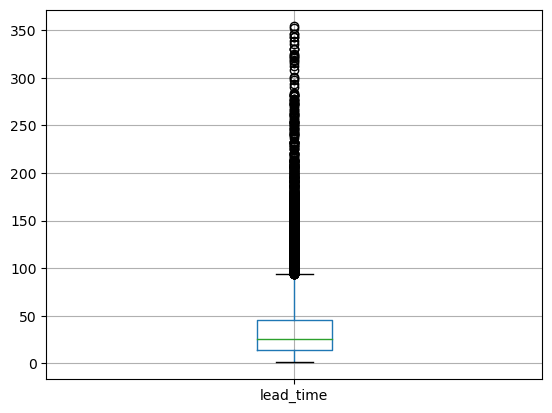

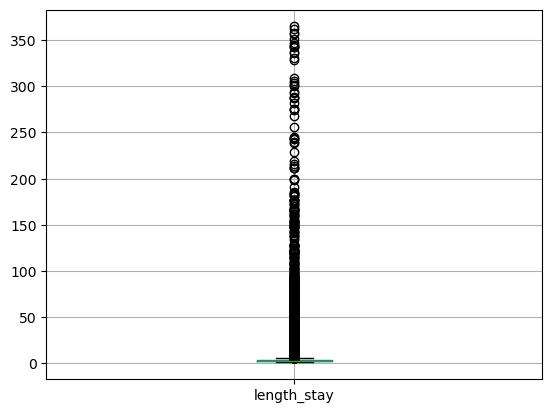

In [72]:
for column in scaling_columns:
    airbnb.boxplot(column)
    plt.show()

In [73]:
airbnb_scaled = airbnb.copy()

for column in scaling_columns:
    airbnb_scaled[column] = (airbnb_scaled[column] - airbnb_scaled[column].mean()) / airbnb_scaled[column].std()

In [74]:
airbnb_scaled.head()

,unified_id,month,year,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool,latitude,longitude
0,10000347,1,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.938606,0.420154,-1.784796,0.023470,0.536739,-0.109353,0,0,34.242234,-116.943297
1,10000347,2,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-1.006276,-0.130582,-1.893957,0.023531,-0.829748,-0.256137,0,0,34.242234,-116.943297
2,10000347,7,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,0.820992,-0.130582,1.490025,0.023531,-0.849512,-0.142713,0,0,34.242230,-116.943300
3,10000347,9,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,0.956346,0.144786,1.615358,0.023531,-0.736579,12.440691,0,0,34.242230,-116.943300
4,10000347,3,2021,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.261833,0.420154,-0.612329,0.023531,-0.872451,-0.219441,0,0,34.242230,-116.943300


#### **Remove Outliers**

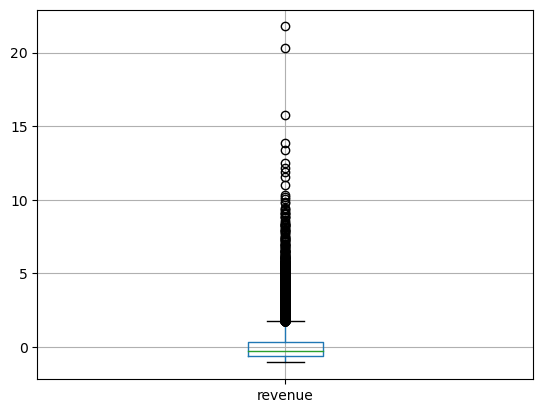

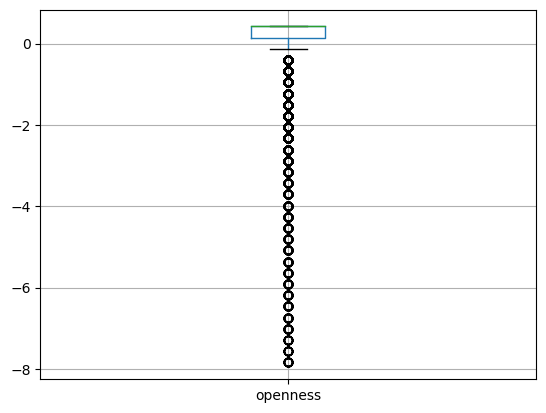

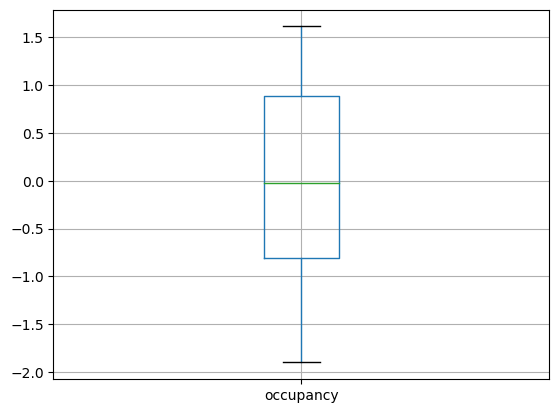

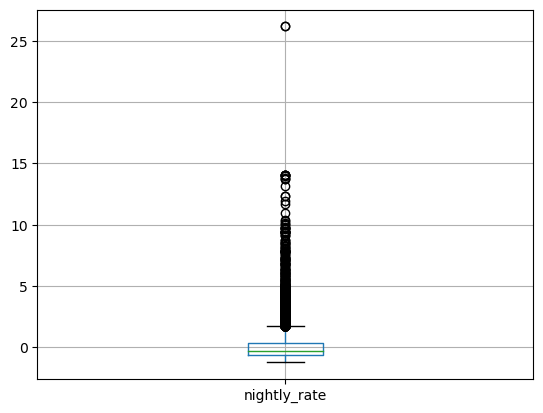

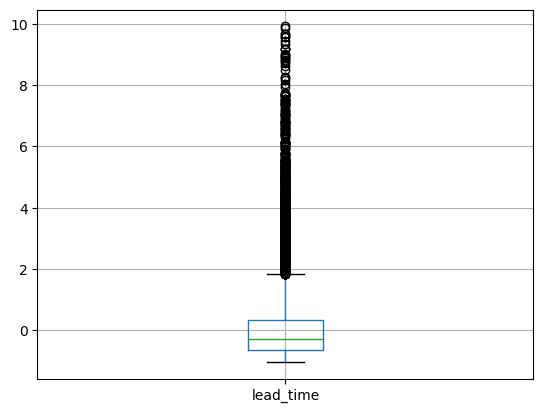

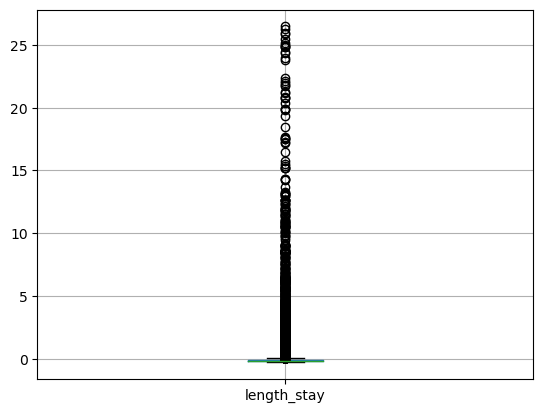

In [75]:
for column in scaling_columns:
    airbnb_scaled.boxplot(column)
    plt.show()

In [76]:
airbnb_cleaned = airbnb_scaled.copy()

for column in scaling_columns:
    upperl = airbnb_cleaned[column].mean() + (3 * airbnb_cleaned[column].std())
    lowerl = airbnb_cleaned[column].mean() - (3 * airbnb_cleaned[column].std())

    airbnb_cleaned = airbnb_cleaned.loc[(airbnb_cleaned[column] <= upperl) & (airbnb_cleaned[column] >= lowerl)].reset_index(drop = True)

In [77]:
airbnb_cleaned.head()

,unified_id,month,year,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool,latitude,longitude
0,10000347,1,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.938606,0.420154,-1.784796,0.023470,0.536739,-0.109353,0,0,34.242234,-116.943297
1,10000347,2,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-1.006276,-0.130582,-1.893957,0.023531,-0.829748,-0.256137,0,0,34.242234,-116.943297
2,10000347,7,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,0.820992,-0.130582,1.490025,0.023531,-0.849512,-0.142713,0,0,34.242230,-116.943300
3,10000347,3,2021,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.261833,0.420154,-0.612329,0.023531,-0.872451,-0.219441,0,0,34.242230,-116.943300
4,10052559,1,2020,92315,Big Bear Lake,Professionals,3,2.5,8,0.438243,0.420154,-0.143342,0.572363,-0.434887,-0.151291,1,0,34.238977,-116.880301


In [78]:
airbnb_cleaned.describe()

,unified_id,month,year,zipcode,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool,latitude,longitude
count,3.726500e+04,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.000000,37265.00000,37265.000000,37265.000000
mean,2.300000e+07,6.266148,2020.845700,92305.011834,3.357091,2.356944,8.816396,-0.091063,0.140529,-0.028718,-0.108694,-0.095885,-0.088446,0.524218,0.07232,34.223773,-116.779877
std,1.087554e+07,3.594849,0.789869,21.299937,0.593980,0.727780,2.543607,0.729216,0.507941,0.985384,0.692871,0.770626,0.256268,0.499420,0.25902,0.044323,0.213257
min,5.874800e+04,1.000000,2020.000000,92252.000000,3.000000,1.000000,3.000000,-1.061170,-2.884263,-1.902043,-1.194779,-1.047144,-0.256137,0.000000,0.00000,34.079448,-116.961096
25%,1.573529e+07,3.000000,2020.000000,92314.000000,3.000000,2.000000,7.000000,-0.627889,0.144786,-0.807740,-0.626348,-0.666702,-0.182745,0.000000,0.00000,34.230680,-116.893485
50%,2.228362e+07,6.000000,2021.000000,92315.000000,3.000000,2.000000,8.000000,-0.270707,0.420154,-0.026096,-0.293110,-0.291435,-0.146049,1.000000,0.00000,34.239720,-116.864710
75%,3.134150e+07,9.000000,2021.000000,92315.000000,4.000000,3.000000,10.000000,0.256269,0.420154,0.794631,0.243449,0.272758,-0.093043,1.000000,0.00000,34.245880,-116.843300
max,4.081730e+07,12.000000,2022.000000,92315.000000,5.000000,7.000000,15.000000,2.997773,0.420154,1.615358,2.415450,2.894964,2.716242,1.000000,1.00000,34.304834,-116.182520


In [79]:
print(f'The cleaned Airbnb dataset now has {airbnb_cleaned.shape[0]} instances')

The cleaned Airbnb dataset now has 37265 instances


In [80]:
print(f'The cleaned Airbnb dataset now has {airbnb_cleaned.shape[1]} attributes')

The cleaned Airbnb dataset now has 19 attributes


In [81]:
airbnb_cleaned.to_csv('airbnb_cleaned.csv', index=False)